# Tree and Ensemble Methods

In [1]:
%matplotlib inline

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, PolynomialFeatures

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier

In [3]:
iris_data, iris_labels = load_iris().data, load_iris().target

In [4]:
iris_data.shape

(150, 4)

In [5]:
iris_labels.shape

(150,)

In [6]:
iris_data_train, iris_data_test, iris_labels_train, iris_labels_test = train_test_split(
    iris_data,
    iris_labels,
    train_size = 100,
    stratify = iris_labels
)

In [7]:
iris_data_train.shape, iris_data_test.shape, iris_labels_train.shape, iris_labels_test.shape

((100, 4), (50, 4), (100,), (50,))

In [8]:
tree = DecisionTreeClassifier(
    criterion = "entropy"
)

In [9]:
tree.fit(iris_data_train, iris_labels_train)

DecisionTreeClassifier(criterion='entropy')

In [10]:
# няма coef_
tree.tree_.impurity

array([1.5848187 , 0.        , 1.        , 0.32275696, 0.        ,
       0.91829583, 0.        , 0.        , 0.20062232, 0.91829583,
       0.        , 0.        , 0.        ])

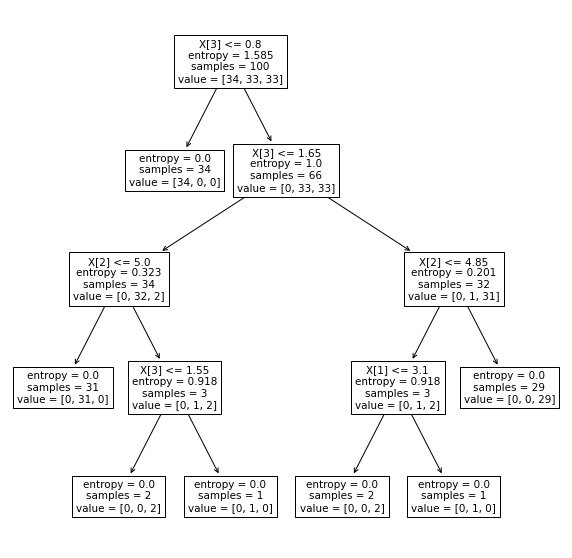

In [11]:
plt.figure(figsize = (10, 10))
plot_tree(tree)
plt.show()

In [12]:
tree.feature_importances_

array([0.        , 0.01738298, 0.07498571, 0.90763131])

In [13]:
tree.score(iris_data_train, iris_labels_train)

1.0

In [14]:
tree.score(iris_data_test, iris_labels_test)

0.94

In [15]:
#See Occam's razor 

In [16]:
tree = DecisionTreeClassifier(
    criterion = "entropy",
    max_depth = 2
)

In [17]:
tree.fit(iris_data_train, iris_labels_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

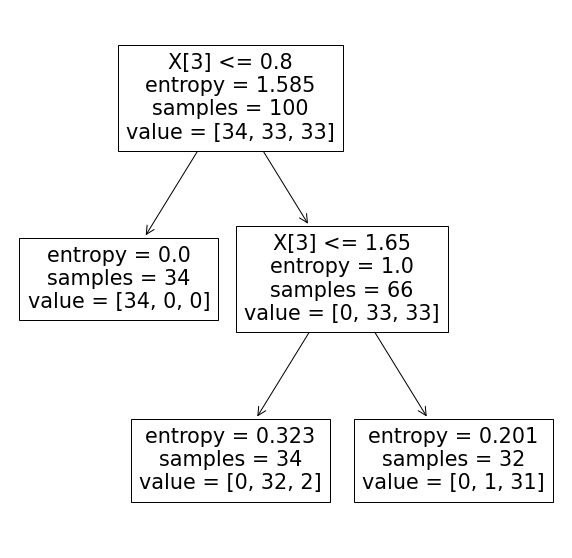

In [18]:
plt.figure(figsize = (10, 10))
plot_tree(tree)
plt.show()

In [19]:
tree.score(iris_data_train, iris_labels_train)

0.97

In [20]:
tree.score(iris_data_test, iris_labels_test)

0.94

In [21]:
tree = DecisionTreeClassifier(
    criterion = "entropy",
    min_samples_leaf= 5, # pruning - вкарваме bias но намаляваме variance
    #min_samples_split=
)

In [22]:
tree.fit(iris_data_train, iris_labels_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)

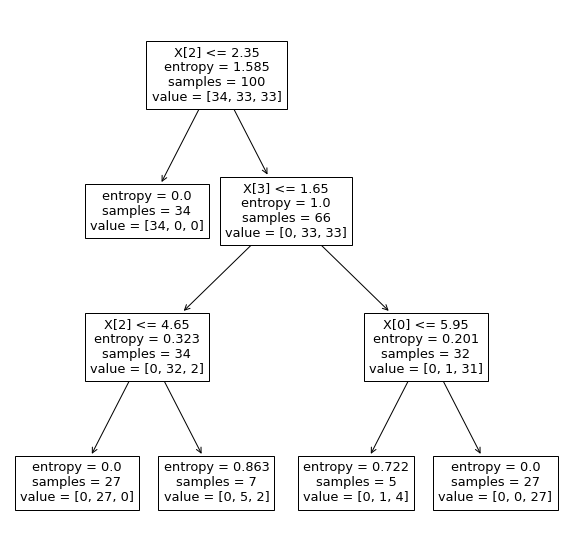

In [23]:
plt.figure(figsize = (10, 10))
plot_tree(tree)
plt.show()

In [24]:
tree = DecisionTreeClassifier(
    criterion = "gini",
    min_samples_leaf= 5
)

In [25]:
tree.fit(iris_data_train, iris_labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

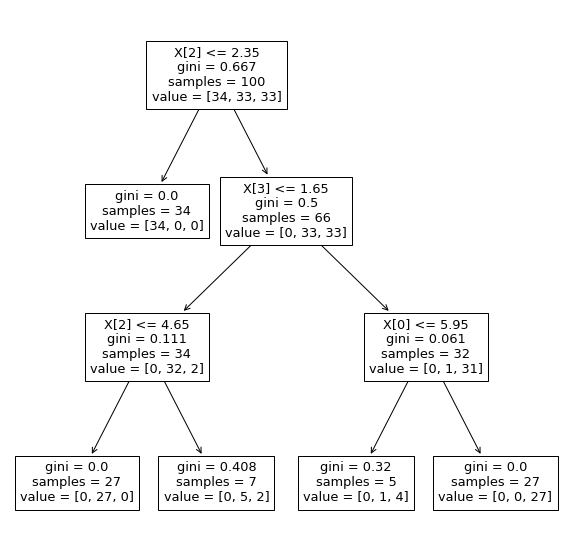

In [26]:
plt.figure(figsize = (10, 10))
plot_tree(tree)
plt.show()

In [27]:
X = iris_data[:, :2] # Sepal length, sepal width
y = iris_labels
h = 0.02 # Step size
color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]


In [28]:
depth_2

DecisionTreeClassifier(max_depth=2)

In [29]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [30]:
x_min

3.3

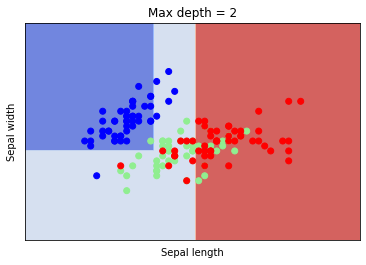

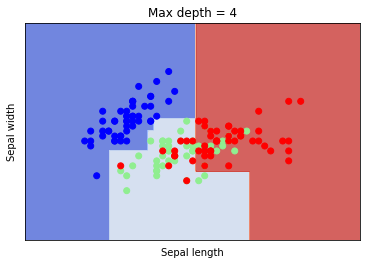

In [31]:
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure()
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

## Decision Forests (Random Forests)

In [32]:
forest = [
    DecisionTreeClassifier(splitter = "random", max_depth = 5),
    DecisionTreeClassifier(splitter = "random", max_depth = 5),
    DecisionTreeClassifier(splitter = "random", max_depth = 5),
    DecisionTreeClassifier(splitter = "random", max_depth = 5)
]

In [33]:
forest

[DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random')]

In [34]:
for tree in forest:
    tree.fit(iris_data_train, iris_labels_train)

In [35]:
forest[0].feature_importances_

array([0.00416282, 0.02561738, 0.02794623, 0.94227357])

In [36]:
forest[1].feature_importances_

array([0.02666933, 0.18645781, 0.76437061, 0.02250225])

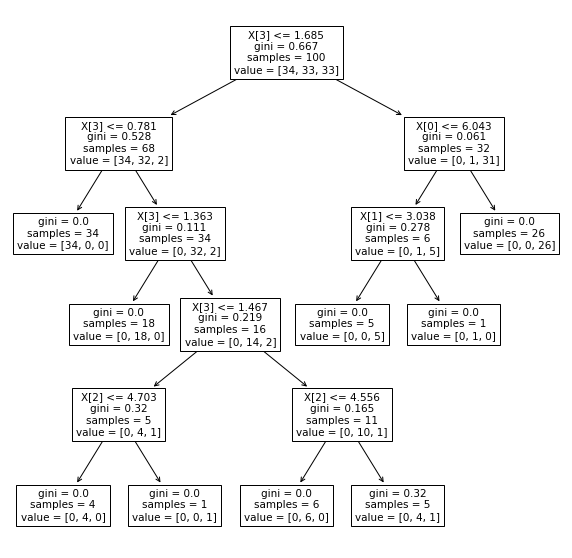

In [37]:
plt.figure(figsize = (10, 10))
plot_tree(forest[0])
plt.show()

In [38]:
# robust = по-надежни - в ds е чувствителност към outlier–и; имунизиран срещу малко шум в инрервалите

In [39]:
random_forest = RandomForestClassifier(n_estimators = 20, max_depth = 3, n_jobs = -1)

In [40]:
random_forest.fit(iris_data_train, iris_labels_train)

RandomForestClassifier(max_depth=3, n_estimators=20, n_jobs=-1)

In [41]:
random_forest.base_estimator_

DecisionTreeClassifier()

In [42]:
random_forest.feature_importances_

array([0.10274055, 0.00432773, 0.47112863, 0.4218031 ])

In [48]:
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 20)

In [49]:
ada.fit(iris_data, iris_labels)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=20)

In [50]:
ada.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=1358989661),
 DecisionTreeClassifier(max_depth=1, random_state=469739684),
 DecisionTreeClassifier(max_depth=1, random_state=47903358),
 DecisionTreeClassifier(max_depth=1, random_state=1132614837),
 DecisionTreeClassifier(max_depth=1, random_state=817574340),
 DecisionTreeClassifier(max_depth=1, random_state=1747782203),
 DecisionTreeClassifier(max_depth=1, random_state=192629613),
 DecisionTreeClassifier(max_depth=1, random_state=992398079),
 DecisionTreeClassifier(max_depth=1, random_state=1188467430),
 DecisionTreeClassifier(max_depth=1, random_state=1702015332),
 DecisionTreeClassifier(max_depth=1, random_state=329899218),
 DecisionTreeClassifier(max_depth=1, random_state=1398259179),
 DecisionTreeClassifier(max_depth=1, random_state=1087343214),
 DecisionTreeClassifier(max_depth=1, random_state=1292629317),
 DecisionTreeClassifier(max_depth=1, random_state=362472886),
 DecisionTreeClassifier(max_depth=1, random_state=1148006848),


In [51]:
ada.score(iris_data_train, iris_labels_train)

0.97

In [52]:
ada.score(iris_data_test, iris_labels_test)

0.98

In [53]:
ada.estimator_errors_

array([3.33333333e-01, 6.00022589e-02, 3.33355372e-01, 1.20397414e-01,
       3.33354186e-01, 2.46496772e-04, 3.33379977e-01, 3.24696290e-04,
       3.33365707e-01, 3.77301322e-04, 3.33379704e-01, 3.49084999e-04,
       3.33368069e-01, 3.77542089e-04, 3.33377933e-01, 3.52106376e-04,
       3.33369433e-01, 3.72712090e-04, 3.33376616e-01, 3.54056001e-04])

In [54]:
ada.estimators_[0]

DecisionTreeClassifier(max_depth=1, random_state=1358989661)

In [56]:
set(ada.estimator_weights_)

{1.0}

In [ ]:
# see gradient boosting: xgboost lightgbm

In [65]:
income_data = pd.concat([
    pd.read_csv("data/adult.data", header = None, sep = ", ", engine = "python"),
    pd.read_csv("data/adult.test", header = None, sep = ", ", engine = "python", skiprows = 1)
])

In [66]:
income_data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income_class"]

In [69]:
income_data.reset_index(drop = True) # за да не получаваме 2 еднакви индекса от двата файла

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [70]:
income_data.shape

(48842, 15)

In [71]:
income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income_class      object
dtype: object

In [72]:
income_attributes = income_data.drop(columns = "income_class")
income_labels = income_data.income_class

In [80]:
transformer = ColumnTransformer([
    ("categorical", FunctionTransformer(func = lambda data: pd.get_dummies(data)), [1, 3] + list(range(5, 10)) + [13]),
    ("everything_else", MinMaxScaler(), range(0, 14))
])

In [81]:
transformer.fit()

TypeError: ColumnTransformer.fit() missing 1 required positional argument: 'X'

In [84]:
column_selector = make_column_selector(dtype_exclude = "object")

In [87]:
poly = PolynomialFeatures(degree = 3, interaction_only = True)

In [89]:
pipeline = Pipeline([
    ("transformer", transformer),
    ("selector", column_selector),
    ("pokynomal_features", poly),
    ("classifier", AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 2))
])

In [91]:
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  FunctionTransformer(func=<function <lambda> at 0x00000110DC53DB40>),
                                                  [1, 3, 5, 6, 7, 8, 9, 13]),
                                                 ('everything_else',
                                                  MinMaxScaler(),
                                                  range(0, 14))])),
                ('selector',
                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000110DACE6FB0>),
                ('pokynomal_features',
                 PolynomialFeatures(degree=3, interaction_only=True)),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=2))])